In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale, StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv('autompg_num.csv')
df.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,115.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [5]:
df.shape

(201, 15)

In [6]:
df.dtypes

normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [7]:
df.skew()

normalized-losses    0.957177
wheel-base           1.031261
length               0.154446
width                0.875029
height               0.029173
curb-weight          0.705804
engine-size          1.979144
bore                -0.032730
stroke              -0.706744
compression-ratio    2.584462
horsepower           1.153019
peak-rpm             0.103069
city-mpg             0.680433
highway-mpg          0.549507
price                1.809675
dtype: float64

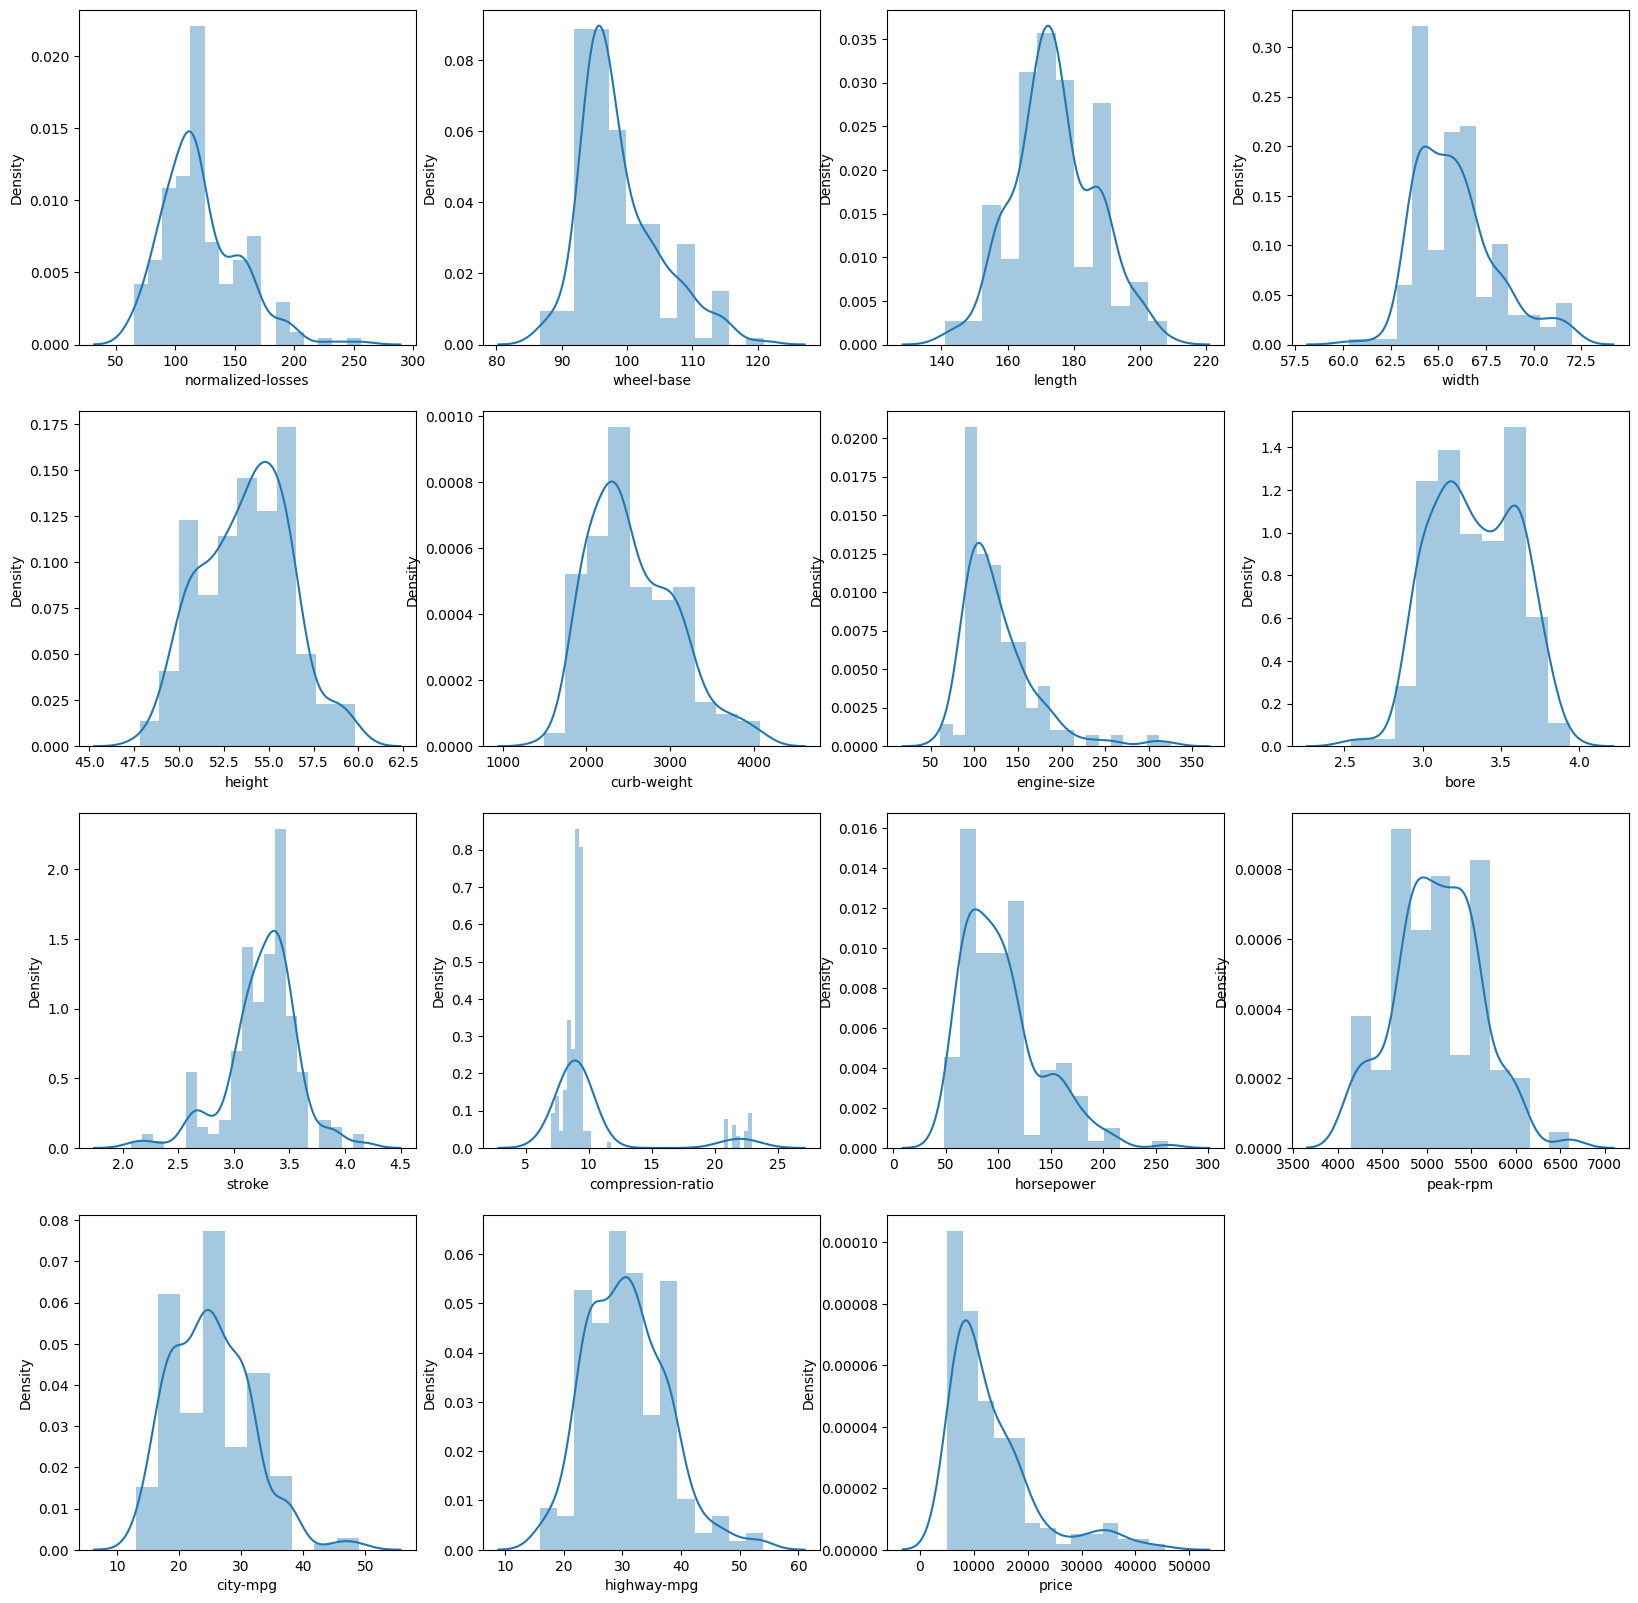

In [8]:
plt.figure(figsize=(20,20))
i=1
for col in df:
  ax=plt.subplot(4,4,i)
  sns.distplot(df[col])
  i+=1


Length, Height, peak_rpm the skew values are in the range -0.5 to 0.5

So they are in tolerable range

Most of the attributes are skewed. As we can see following are right skewed or **positively skewed:**

normalized-losses    0.957177

**wheel-base           1.031261**

width                0.875029

curb-weight          0.705804

**engine-size          1.979144**

**compression-ratio    2.584462**

**horsepower           1.153019**

city-mpg             0.680433

highway-mpg          0.549507

*price                1.809675*


---



---



Following are **negatively skewed**

bore                -0.032730

stroke              -0.706744


Even the target column is also Skewed, so the model building will get effected with a skewed target.


## Outlier handling

1. Dropping
2. Capping
4. Transformation

In [22]:
# Dropping

# highway-mpg, curb-weight, stroke

In [23]:
#IQR

In [24]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR= q3-q1
IQR

normalized-losses      36.00
wheel-base              7.90
length                 16.70
width                   2.50
height                  3.50
curb-weight           757.00
engine-size            43.00
bore                    0.43
stroke                  0.30
compression-ratio       0.80
horsepower             46.00
peak-rpm              700.00
city-mpg               11.00
highway-mpg             9.00
price                8725.00
dtype: float64

In [25]:
min= q1-1.5*IQR
max= q3+1.5*IQR

In [26]:
df_drop=df[['highway-mpg','curb-weight','stroke']]

In [27]:
df_iqr=df_drop[~((df_drop<(q1-1.5*IQR)) | (df_drop>(q3+1.5*IQR))).any(axis=1)]

In [ ]:
df_iqr.skew()

highway-mpg    0.222421
curb-weight    0.614632
stroke        -0.168870
dtype: float64

In [ ]:
#Z-score

In [41]:
import scipy
from scipy import stats

In [ ]:
df_drop1=df[['highway-mpg','curb-weight','stroke']]
zscore_df=scipy.stats.zscore(df_drop1)
df_zscore= df_drop1[~((zscore_df>3)| (zscore_df<-3))]
df_zscore

,highway-mpg,curb-weight,stroke
0,27.0,2548,2.68
1,27.0,2548,2.68
2,26.0,2823,3.47
3,30.0,2337,3.40
4,22.0,2824,3.40
...,...,...,...
196,28.0,2952,3.15
197,25.0,3049,3.15
198,23.0,3012,2.87
199,27.0,3217,3.40


In [ ]:
df_drop1.skew()

highway-mpg    0.549507
curb-weight    0.705804
stroke        -0.706744
dtype: float64

In [ ]:
# boxplot

<Axes: >

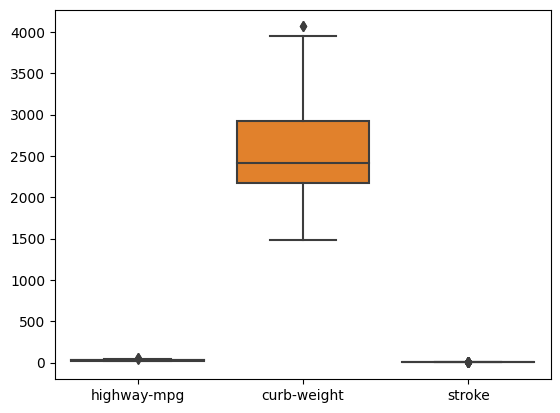

In [ ]:
sns.boxplot(df_drop)

<Axes: >

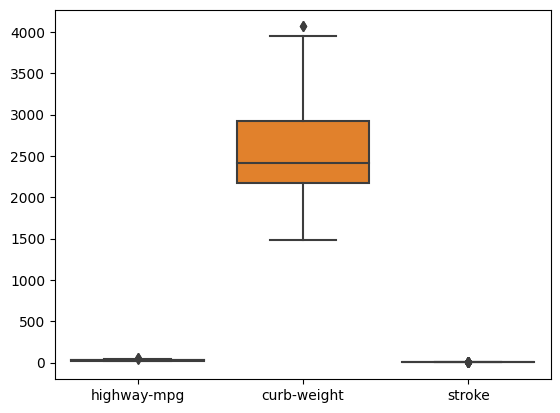

In [ ]:
sns.boxplot(df_drop1)

In [ ]:
# capping

In [15]:
df_cap=df[['highway-mpg','curb-weight','stroke']]


In [16]:
for i in df_cap.columns:
    q1=df_cap[i].quantile(0.25)
    q3=df_cap[i].quantile(0.75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    uc=df_cap[i].quantile(0.95)
    lc=df_cap[i].quantile(0.05)
    for ind1 in df_cap[i].index:
        if df_cap.loc[ind1,i]>ub:
            df_cap.loc[ind1,i]=uc
        if df_cap.loc[ind1,i]<lb:
            df_cap.loc[ind1,i]=lc

In [17]:
df_cap.skew()

highway-mpg    0.221358
curb-weight    0.593246
stroke        -0.635971
dtype: float64

In [36]:
df[['highway-mpg','curb-weight','stroke']]=df_cap[['highway-mpg','curb-weight','stroke']]

In [37]:
df.

normalized-losses    0.957177
wheel-base           1.031261
length               0.154446
width                0.875029
height               0.029173
curb-weight          0.593246
engine-size          1.979144
bore                -0.032730
stroke              -0.635971
compression-ratio    2.584462
horsepower           1.153019
peak-rpm             0.103069
city-mpg             0.680433
highway-mpg          0.221358
price                1.809675
dtype: float64

In [ ]:
#Transformation (positively skewed)
#log transform
#square root transform
#reciprocal transform


#Transformation (negatively skewed)
#exponential transform
#squared transformation
#cube transformation

# smart way
# Box-cox transform
# yeo-Jhonson transform


In [53]:
df_trans=df[['wheel-base','compression-ratio','engine-size','horsepower','price']]

In [ ]:
((df_trans)**0.3).skew()

wheel-base           0.915397
compression-ratio    2.435071
engine-size          1.169475
horsepower           0.605540
price                0.996569
dtype: float64

In [ ]:
((df_trans)**0.5).skew()

wheel-base           0.948483
compression-ratio    2.486630
engine-size          1.384786
horsepower           0.753061
price                1.221239
dtype: float64

In [ ]:
(np.log1p(df_trans)).skew()

wheel-base           0.867378
compression-ratio    2.368595
engine-size          0.873866
horsepower           0.400728
price                0.678728
dtype: float64

In [56]:
df_trans=df[['wheel-base','engine-size','horsepower','price']]
df_trans= np.log1p(df_trans)
df[['wheel-base','engine-size','horsepower','price']]=df_trans

In [57]:
df.skew()

normalized-losses    0.957177
wheel-base           0.867378
length               0.154446
width                0.875029
height               0.029173
curb-weight          0.593246
engine-size          0.873866
bore                -0.032730
stroke              -0.635971
compression-ratio    2.584462
horsepower           0.400728
peak-rpm             0.103069
city-mpg             0.680433
highway-mpg          0.221358
price                0.678728
dtype: float64

In [ ]:
np.log1p(df['compression-ratio']).skew()

2.3685954831157425

In [ ]:
(df['compression-ratio']**.5).skew()

2.4866297804171253

<Axes: xlabel='compression-ratio', ylabel='price'>

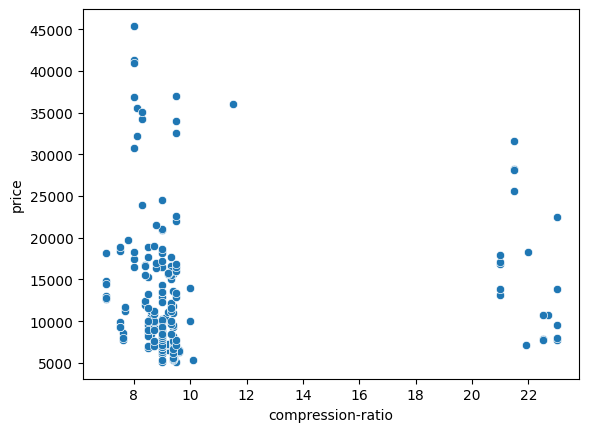

In [ ]:
sns.scatterplot(df,x='compression-ratio', y='price')

<Axes: xlabel='horsepower', ylabel='compression-ratio'>

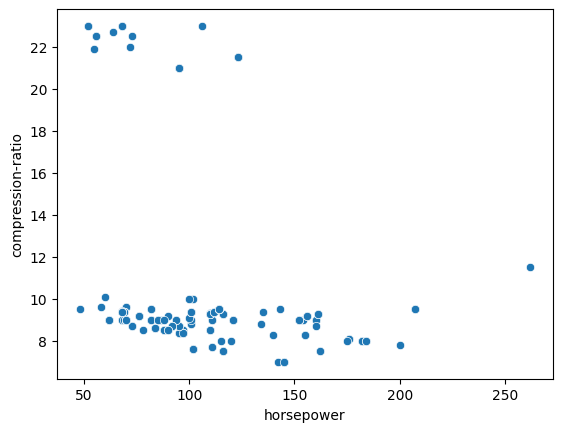

In [ ]:
sns.scatterplot(df,x='horsepower', y='compression-ratio')

In [70]:
df1=pd.read_csv('preprocess.csv')
df1.head()

,num-of-doors,body-style,drive-wheels,num-of-cylinders,fuel-system,price,aspiration_turbo,engine-location_rear,gas,diesel,...,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price.1
0,2,0,1.0,4,5,13495.0,0,0,0.0,1.0,...,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,0,1.0,4,5,16500.0,0,0,0.0,1.0,...,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2,2,1.0,6,5,16500.0,0,0,0.0,1.0,...,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,3,2.0,4,5,13950.0,0,0,0.0,1.0,...,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,4,3,0.0,5,5,17450.0,0,0,0.0,1.0,...,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


<Axes: xlabel='engine-type', ylabel='compression-ratio'>

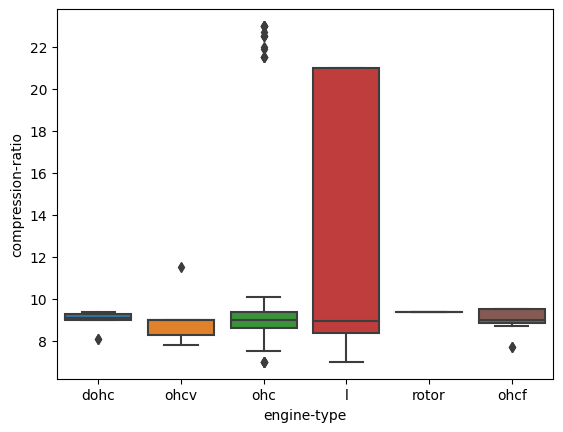

In [ ]:
sns.boxplot(df1, x='engine-type', y='compression-ratio')

# number of cylinders, drive wheels, bore

<Axes: xlabel='drive-wheels', ylabel='compression-ratio'>

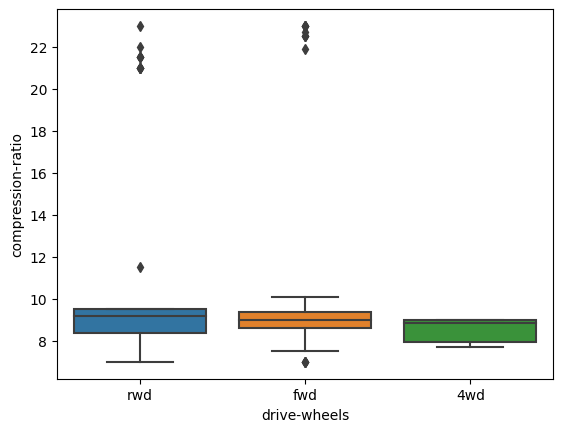

In [ ]:
sns.boxplot(df1, x='drive-wheels', y='compression-ratio')

<Axes: xlabel='num-of-cylinders', ylabel='compression-ratio'>

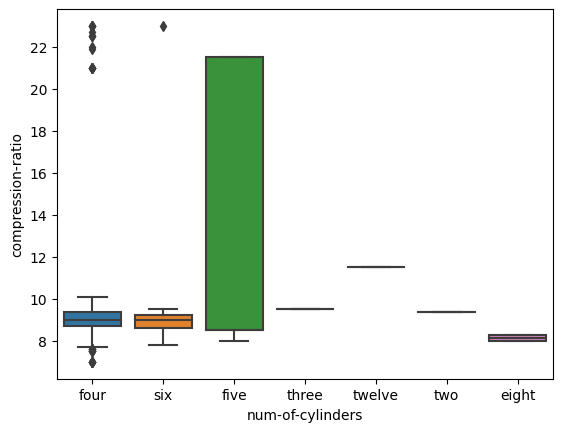

In [ ]:
sns.boxplot(df1, x='num-of-cylinders', y='compression-ratio')

In [82]:
df1.drop('price.1',axis=1)

,num-of-doors,body-style,drive-wheels,num-of-cylinders,fuel-system,price,aspiration_turbo,engine-location_rear,gas,diesel,...,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,2,0,1.0,4,5,0.319261,0,0,0.0,1.0,...,-2.034081,-0.004148,0.238187,0.520966,-2.123963,-0.291435,0.386571,-0.248239,-0.652249,-0.551223
1,2,0,1.0,4,5,0.720545,0,0,0.0,1.0,...,-2.034081,-0.004148,0.238187,0.520966,-2.123963,-0.291435,0.386571,-0.248239,-0.652249,-0.551223
2,2,2,1.0,6,5,0.720545,0,0,0.0,1.0,...,-0.559713,0.543118,0.794608,-2.433363,0.783486,-0.291435,1.364889,-0.248239,-0.964397,-0.707273
3,4,3,2.0,4,5,0.385449,0,0,0.0,1.0,...,0.218425,-0.424051,-0.388042,-0.526138,0.525864,-0.041121,0.134349,0.799996,-0.184027,-0.083072
4,4,3,0.0,5,5,0.832283,0,0,0.0,1.0,...,0.218425,0.545108,0.398703,-0.526138,0.525864,-0.541748,0.492227,0.799996,-1.120471,-1.331474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,4,3,1.0,4,5,0.761851,0,0,0.0,1.0,...,0.709881,0.799836,0.527184,1.680260,-0.394215,-0.166278,0.466159,0.590349,-0.340101,-0.395172
197,4,3,1.0,4,5,1.006868,1,0,0.0,1.0,...,0.709881,0.992872,0.527184,1.680260,-0.394215,-0.366529,1.479240,0.380702,-0.964397,-0.863323
198,4,3,1.0,6,5,1.247495,0,0,0.0,1.0,...,0.709881,0.919240,1.255605,0.932328,-1.424703,-0.341497,0.948933,0.799996,-1.120471,-1.175424
199,4,3,1.0,6,3,1.336971,1,0,1.0,0.0,...,0.709881,1.327203,0.626753,-1.199277,0.525864,3.212954,0.249064,-0.667532,0.128120,-0.551223


In [55]:
#arr=np.asarray(df_trans.values)
#data,l=stats.boxcox(arr)

## **Scaling features**

1. Min max scaler
2. Standard Scaler

In [62]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
#for col in df:
 # df_scaled3=(df[col]-df[col].min())/(df[col].max()-df[col].min())

In [ ]:
#for col in df:
 # df_scaled4=(df[col]-df[col].mean())/df[col].std()

In [ ]:
#sc1=MinMaxScaler()
#df_scaled1=pd.DataFrame(sc1.fit_transform(df),columns=df.column)
#df_scaled1.head()


In [83]:
sc2=StandardScaler()
df_scaled2=pd.DataFrame(sc2.fit_transform(df),columns=df.columns)
df_scaled2.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,-0.178306,-1.794724,-0.439409,-0.853460,-2.034081,-0.004148,0.238187,0.520966,-2.123963,-0.291435,0.386571,-0.248239,-0.652249,-0.551223,0.319261
1,-0.178306,-1.794724,-0.439409,-0.853460,-2.034081,-0.004148,0.238187,0.520966,-2.123963,-0.291435,0.386571,-0.248239,-0.652249,-0.551223,0.720545
2,-0.178306,-0.715084,-0.244152,-0.185597,-0.559713,0.543118,0.794608,-2.433363,0.783486,-0.291435,1.364889,-0.248239,-0.964397,-0.707273,0.720545
3,1.351431,0.199340,0.195176,0.148335,0.218425,-0.424051,-0.388042,-0.526138,0.525864,-0.041121,0.134349,0.799996,-0.184027,-0.083072,0.385449
4,1.351431,0.132024,0.195176,0.243744,0.218425,0.545108,0.398703,-0.526138,0.525864,-0.541748,0.492227,0.799996,-1.120471,-1.331474,0.832283


In [84]:
sc2.mean_

array([1.20711443e+02, 4.60136398e+00, 1.74200995e+02, 6.58890547e+01,
       5.37666667e+01, 2.55008458e+03, 4.80874351e+00, 3.33069157e+00,
       3.25711443e+00, 1.01642786e+01, 4.59010796e+00, 5.11840796e+03,
       2.51791045e+01, 3.05323383e+01, 9.35021185e+00])

In [85]:
sc2.var_

array([1.02602619e+03, 3.48889014e-03, 1.51080596e+02, 4.39420856e+00,
       5.96202322e+00, 2.52503341e+05, 7.78400904e-02, 7.15049956e-02,
       7.38294844e-02, 1.59599489e+01, 1.10308702e-01, 2.27521844e+05,
       4.10524987e+01, 4.10648746e+01, 2.50960885e-01])

In [86]:
sc2.with_std

True

In [87]:
#Join the cat and num

df_scaled2.columns

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [88]:
df1[df_scaled2.columns]= df_scaled2.values

In [89]:
df1.head(2)

,num-of-doors,body-style,drive-wheels,num-of-cylinders,fuel-system,price,aspiration_turbo,engine-location_rear,gas,diesel,...,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price.1
0,2,0,1.0,4,5,0.319261,0,0,0.0,1.0,...,-0.004148,0.238187,0.520966,-2.123963,-0.291435,0.386571,-0.248239,-0.652249,-0.551223,13495.0
1,2,0,1.0,4,5,0.720545,0,0,0.0,1.0,...,-0.004148,0.238187,0.520966,-2.123963,-0.291435,0.386571,-0.248239,-0.652249,-0.551223,16500.0


## Train test split

In [91]:
from sklearn.model_selection import train_test_split

y=df1.price
X=df1.drop('price', axis=1)
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=10)



(61, 28)

In [93]:
print(X_train.shape)
print(X_test.shape)

(140, 28)
(61, 28)


In [94]:
print(y_train.shape)
print(y_test.shape)

(140,)
(61,)


In [95]:
from google.colab import files
df1.to_csv('Final_preprocess.csv', encoding = 'utf-8-sig', index=None)
files.download('Final_preprocess.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>